<a href="https://colab.research.google.com/github/luthfifathurrahman/Bootcamp-DQLab---Airbnb-Singapore/blob/main/Airbnb_Singapore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb Singapore Project**

In [ ]:
# Import Library
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import month_name
import plotly.express as px
import geopy.distance

## Data Profiling DQLab_listings

In [ ]:
# View the contents of the DQLab_listings dataset
df_listings = pd.read_excel("/content/drive/MyDrive/My Project/Airbnb Singapore/DQLab_listings(22Sep2022).xlsx")
df_listings.tail(5)

Unnamed: 0                  id  \
4156        4156  720000271010003456   
4157        4157  720000552643956736   
4158        4158  720695231887902208   
4159        4159  720724511357857536   
4160        4160  720811961088959360   

                                                   name    host_id  \
4156   Marine Parade 2br w/ gym, bbq & pool, nr airport  466330896   
4157    Orchard 2br w/ gym, bbq & pool, nr Somerset MRT  466330896   
4158                                 Zi Xuan Apartments  480404953   
4159     #7 Studio with toilet & kitchen @Sks Pavillion  158018542   
4160  Êñ∞Âä†Âù°Êª®Êµ∑ÊπæÈáëÊ≤ôÈÖíÂ∫óÂê´Êó†ËæπÊ≥≥Ê±†Á©∫‰∏≠Ëä±Âõ≠ÂÅ•Ë∫´Êàø‰ªòË¥π‰∏ãÂçàËå∂È∏°Â∞æÈÖíÊó©È§êÊµ∑ÊôØÂüéÊôØÈúÄË¶ÅÂçáÁ∫ßÂüéÊôØ‰ø±‰πêÈÉ®Êàø...  467355165   

       host_name  neighbourhood  latitude   longitude        room_type  price  \
4156  Blueground  Marine Parade  1.299569  103.898567  Entire home/apt    263   
4157  Blueground         Newton  1.301816  103.839077  Entire home/apt    354   
4158   Natividad         Newton  1.307921  103.831502  Entire home/apt    398   
4159      Betris      Woodlands  1.470580  103.762420     Private room     27   
4160        Deng  Downtown Core  1.282065  103.858714     Private room    813   

      minimum_nights  availability_365  
4156              92               365  
4157              92               365  
4158               4               358  
4159               1                87  
4160               1               359

In [ ]:
# View how many rows and columns are in the DQLab_listings dataset
df_listings.shape

(4161, 12)

In [ ]:
# View information on the number of null values and data type of each column in the DQLab_listings dataset
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4161 non-null   int64  
 1   id                4161 non-null   int64  
 2   name              4161 non-null   object 
 3   host_id           4161 non-null   int64  
 4   host_name         4161 non-null   object 
 5   neighbourhood     4161 non-null   object 
 6   latitude          4161 non-null   float64
 7   longitude         4161 non-null   float64
 8   room_type         4161 non-null   object 
 9   price             4161 non-null   int64  
 10  minimum_nights    4161 non-null   int64  
 11  availability_365  4161 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 390.2+ KB


In [ ]:
# View how many unique values there are in each column in the DQLab_listings dataset
df_listings.nunique()

Unnamed: 0          4161
id                  4161
name                3859
host_id             1130
host_name            897
neighbourhood         45
latitude            3285
longitude           3334
room_type              4
price                633
minimum_nights        47
availability_365     336
dtype: int64

## Data Profiling DQLab_neighbourhood

In [ ]:
# View the contents of the DQLab_neighbourhood dataset
df_neighbourhood = pd.read_excel("/content/drive/MyDrive/My Project/Airbnb Singapore/DQLab_nieghbourhood(22Sep2022).xlsx")
df_neighbourhood.head(5)

Unnamed: 0 neighbourhood_group  neighbourhood
0           0      Central Region         Bishan
1           1      Central Region    Bukit Merah
2           2      Central Region    Bukit Timah
3           3      Central Region  Downtown Core
4           4      Central Region        Geylang

In [ ]:
# View how many rows and columns are in the DQLab_neighbourhood dataset
df_neighbourhood.shape

(55, 3)

In [ ]:
# View information on the number of null values and data type of each column in the DQLab_neighbourhood dataset
df_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           55 non-null     int64 
 1   neighbourhood_group  55 non-null     object
 2   neighbourhood        55 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [ ]:
# View how many unique values there are in each column in the DQLab_neighbourhood dataset
df_neighbourhood.nunique()

Unnamed: 0             55
neighbourhood_group     5
neighbourhood          55
dtype: int64

## Data Profiling DQLab_reviews

In [ ]:
# View the contents of the df_reviews dataset
df_reviews = pd.read_excel("/content/drive/MyDrive/My Project/Airbnb Singapore/DQLab_reviews(22Sep2022).xlsx")
df_reviews.head(5)

Unnamed: 0  listing_id        date
0          28       71609  2018-07-14
1          29       71609  2019-01-06
2          30       71609  2019-07-27
3          31       71609  2019-08-11
4          32       71609  2019-09-07

In [ ]:
# View how many rows and columns are in the df_reviews dataset
df_reviews.shape

(49695, 3)

In [ ]:
# View information on the number of null values and data type of each column in the df_reviews dataset
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49695 entries, 0 to 49694
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49695 non-null  int64 
 1   listing_id  49695 non-null  int64 
 2   date        49695 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
# View how many unique values there are in each column in the df_reviews dataset
df_reviews.nunique()

Unnamed: 0    49695
listing_id     2486
date           1726
dtype: int64

## Data Cleansing DQLab_listings

### 1. Checking Unnamed: 0 Column

In [ ]:
# Removing Unnamed: 0 Column
df_listings = df_listings.drop(df_listings.columns[0], axis = 1)
df_listings.tail(5)

id                                               name  \
4156  720000271010003456   Marine Parade 2br w/ gym, bbq & pool, nr airport   
4157  720000552643956736    Orchard 2br w/ gym, bbq & pool, nr Somerset MRT   
4158  720695231887902208                                 Zi Xuan Apartments   
4159  720724511357857536     #7 Studio with toilet & kitchen @Sks Pavillion   
4160  720811961088959360  Êñ∞Âä†Âù°Êª®Êµ∑ÊπæÈáëÊ≤ôÈÖíÂ∫óÂê´Êó†ËæπÊ≥≥Ê±†Á©∫‰∏≠Ëä±Âõ≠ÂÅ•Ë∫´Êàø‰ªòË¥π‰∏ãÂçàËå∂È∏°Â∞æÈÖíÊó©È§êÊµ∑ÊôØÂüéÊôØÈúÄË¶ÅÂçáÁ∫ßÂüéÊôØ‰ø±‰πêÈÉ®Êàø...   

        host_id   host_name  neighbourhood  latitude   longitude  \
4156  466330896  Blueground  Marine Parade  1.299569  103.898567   
4157  466330896  Blueground         Newton  1.301816  103.839077   
4158  480404953   Natividad         Newton  1.307921  103.831502   
4159  158018542      Betris      Woodlands  1.470580  103.762420   
4160  467355165        Deng  Downtown Core  1.282065  103.858714   

            room_type  price  minimum_nights  availability_365  
4156  Entire home/apt    263              92               365  
4157  Entire home/apt    354              92               365  
4158  Entire home/apt    398               4               358  
4159     Private room     27               1                87  
4160     Private room    813               1               359

### 2. Checking price Column

In [ ]:
# Check the statistical description of the price column
df_listings["price"].describe().to_frame().T

count        mean         std  min   25%    50%    75%      max
price  4161.0  214.505167  454.921421  0.0  60.0  120.0  235.0  12494.0

In [ ]:
# Delete rows that have a value of 0 in the price column
df_listings = df_listings[df_listings["price"] > 0]
df_listings["price"].describe().to_frame().T

count        mean         std   min   25%    50%     75%      max
price  4160.0  214.556731  454.963947  13.0  60.0  120.0  235.25  12494.0

### 3. Removing Outliers

In [ ]:
# # Create a function to remove outliers
# def removing_outliers(data, x):
#     Q1 = data[x].quantile(0.25)
#     Q3 = data[x].quantile(0.75)
#     IQR = Q3 - Q1
#     data = data[~((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR)))]
#     return data

In [ ]:
# # Removing outliers in the price column
# df_listings = removing_outliers(df_listings, 'price')

### 4. Save to Excel

In [ ]:
# # Save the modified file into excel format
# df_listings.to_excel("listing.xlsx")
# from google.colab import files
# files.download("listing.xlsx")

## Data Cleansing **DQLab_neighbourhood**

### 1. Delete Unnamed: 0 Column

In [ ]:
# Removing Unnamed: 0 Column
df_neighbourhood = df_neighbourhood.drop(df_neighbourhood.columns[0], axis = 1)
df_neighbourhood.head(5)

neighbourhood_group  neighbourhood
0      Central Region         Bishan
1      Central Region    Bukit Merah
2      Central Region    Bukit Timah
3      Central Region  Downtown Core
4      Central Region        Geylang

## Data Cleansing DQLab_reviews


### 1. Delete Unnamed: 0 Column

In [ ]:
# Removing Unnamed: 0 Column
df_reviews = df_reviews.drop(df_reviews.columns[0], axis = 1)
df_reviews.head(5)

listing_id        date
0       71609  2018-07-14
1       71609  2019-01-06
2       71609  2019-07-27
3       71609  2019-08-11
4       71609  2019-09-07

### 2. Changing the data type of the date column from object type to datetime type

In [ ]:
# Changing the data type of the date column
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

## Data Analytics

In [ ]:
# Create a join dataframe from listings and neighbourhood dataframe
df_listings_neighbourhood = pd.merge(df_listings, df_neighbourhood, on = ["neighbourhood"])
df_listings_neighbourhood.tail(5)

id                                               name  \
4155  709939057124036992               Maple Tiny Pod  @ Gardens by the Bay   
4156  713931790395344640              Juniper Tiny Pod @ Gardens by the Bay   
4157  716283486212132352               Bamboo Tiny Pod @ Gardens by the Bay   
4158  718751971614977024            Stay 3 nights at MBS during F1 weekend!   
4159  540170321699689728  PasirPutih Travel Homestay(10pax)MYPGU-PasirGu...   

        host_id host_name          neighbourhood  latitude   longitude  \
4155  109741357  Lorraine           Marina South  1.278269  103.861980   
4156  109741357  Lorraine           Marina South  1.278346  103.861918   
4157  109741357  Lorraine           Marina South  1.278334  103.861971   
4158  480021225    Ka Hoe           Marina South  1.283422  103.861476   
4159  318843294      Adam  North-Eastern Islands  1.439270  103.932050   

            room_type  price  minimum_nights  availability_365  \
4155     Private room    616               1                15   
4156     Private room    591               1                15   
4157     Private room    616               1                12   
4158     Private room    550               3                84   
4159  Entire home/apt     47               2               181   

     neighbourhood_group  
4155      Central Region  
4156      Central Region  
4157      Central Region  
4158      Central Region  
4159   North-East Region

In [ ]:
# Create a join dataframe from reviews and listings dataframe
df_review_listings = pd.merge(df_reviews, df_listings, left_on='listing_id', right_on='id')
df_review_listings.head(5)

listing_id       date     id                                 name  host_id  \
0       71609 2018-07-14  71609  Ensuite Room (Room 1 & 2) near EXPO   367042   
1       71609 2019-01-06  71609  Ensuite Room (Room 1 & 2) near EXPO   367042   
2       71609 2019-07-27  71609  Ensuite Room (Room 1 & 2) near EXPO   367042   
3       71609 2019-08-11  71609  Ensuite Room (Room 1 & 2) near EXPO   367042   
4       71609 2019-09-07  71609  Ensuite Room (Room 1 & 2) near EXPO   367042   

  host_name neighbourhood  latitude  longitude     room_type  price  \
0   Belinda      Tampines   1.34537  103.95887  Private room    145   
1   Belinda      Tampines   1.34537  103.95887  Private room    145   
2   Belinda      Tampines   1.34537  103.95887  Private room    145   
3   Belinda      Tampines   1.34537  103.95887  Private room    145   
4   Belinda      Tampines   1.34537  103.95887  Private room    145   

   minimum_nights  availability_365  
0              92               340  
1              92               340  
2              92               340  
3              92               340  
4              92               340

In [ ]:
# Create a join dataframe from reviews, listings and neighbourhood dataframe
df_review_listings_neighbourhood = pd.merge(df_review_listings, df_neighbourhood, on='neighbourhood')
df_review_listings_neighbourhood.tail(5)

listing_id       date                  id  \
49690            53579193 2022-07-23            53579193   
49691            53579193 2022-07-31            53579193   
49692            53579193 2022-08-21            53579193   
49693  540170321699689728 2022-05-16  540170321699689728   
49694  540170321699689728 2022-06-18  540170321699689728   

                                                    name    host_id  \
49690   Premier Deluxe Room of MBS  Hotel ÈáëÊ≤ôÈÖíÂ∫óÂ•¢ÂçéÂ∫¶ÂÅáË±™ÂçéÊàøÂ∞äË¥µÊàø   46075735   
49691   Premier Deluxe Room of MBS  Hotel ÈáëÊ≤ôÈÖíÂ∫óÂ•¢ÂçéÂ∫¶ÂÅáË±™ÂçéÊàøÂ∞äË¥µÊàø   46075735   
49692   Premier Deluxe Room of MBS  Hotel ÈáëÊ≤ôÈÖíÂ∫óÂ•¢ÂçéÂ∫¶ÂÅáË±™ÂçéÊàøÂ∞äË¥µÊàø   46075735   
49693  PasirPutih Travel Homestay(10pax)MYPGU-PasirGu...  318843294   
49694  PasirPutih Travel Homestay(10pax)MYPGU-PasirGu...  318843294   

        host_name          neighbourhood  latitude  longitude  \
49690  Sweet Home           Marina South   1.28359  103.86182   
49691  Sweet Home           Marina South   1.28359  103.86182   
49692  Sweet Home           Marina South   1.28359  103.86182   
49693        Adam  North-Eastern Islands   1.43927  103.93205   
49694        Adam  North-Eastern Islands   1.43927  103.93205   

             room_type  price  minimum_nights  availability_365  \
49690     Private room   1302               1                86   
49691     Private room   1302               1                86   
49692     Private room   1302               1                86   
49693  Entire home/apt     47               2               181   
49694  Entire home/apt     47               2               181   

      neighbourhood_group  
49690      Central Region  
49691      Central Region  
49692      Central Region  
49693   North-East Region  
49694   North-East Region

In [ ]:
# Adding Year, Month, and Year_Month Column
df_review_listings_neighbourhood['year'] = pd.DatetimeIndex(df_review_listings_neighbourhood['date']).year
df_review_listings_neighbourhood['month'] = df_review_listings_neighbourhood['date'].dt.strftime('%B')
df_review_listings_neighbourhood['year_month'] = pd.to_datetime(df_review_listings_neighbourhood['date']).dt.to_period('m')

In [ ]:
# Mapping the location of the listing
fig = px.scatter_mapbox(df_listings_neighbourhood, lat="latitude", lon="longitude", hover_name="name", hover_data=["neighbourhood", "host_name", "room_type", "minimum_nights"], zoom=10, height=600,color="neighbourhood_group", size="minimum_nights",
                  color_continuous_scale=px.colors.cyclical, size_max=15)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### The Total Competitors in Each Region

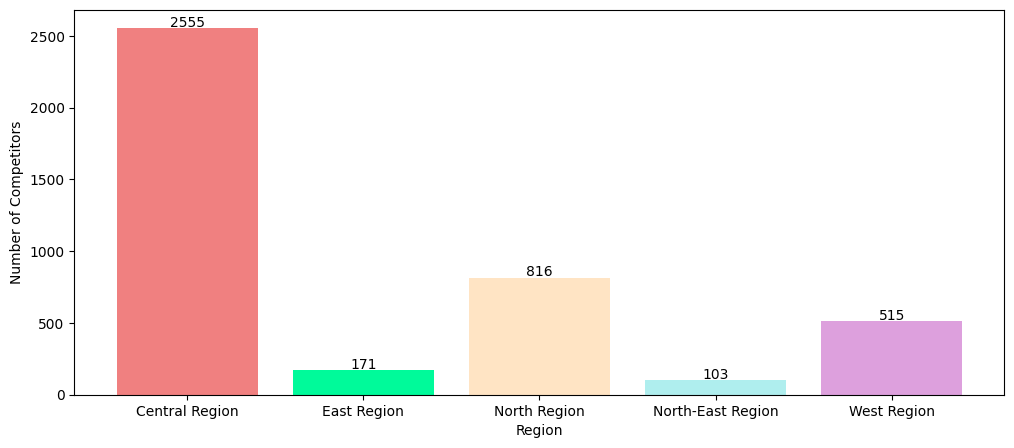

In [ ]:
# Checking the total competitors in each region
col = df_listings_neighbourhood["neighbourhood_group"]
col = pd.Categorical(col, ["Central Region", "East Region", "North Region", "North-East Region", "West Region"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.ylabel("Number of Competitors", fontsize = 10)
plt.xlabel("Region", fontsize = 10)
plt.text(x = "Central Region", y = 2566, s = "2555", ha='center',fontsize = 10)
plt.text(x = 'North Region', y = 826, s = "816", ha='center',fontsize = 10)
plt.text(x = 'West Region', y = 525, s = "515", ha='center',fontsize = 10)
plt.text(x = 'East Region', y = 181, s = "171", ha='center',fontsize = 10)
plt.text(x = 'North-East Region', y = 113, s = "103", ha='center',fontsize = 10)
plt.show()

### The Total Properties Offered by Competitors

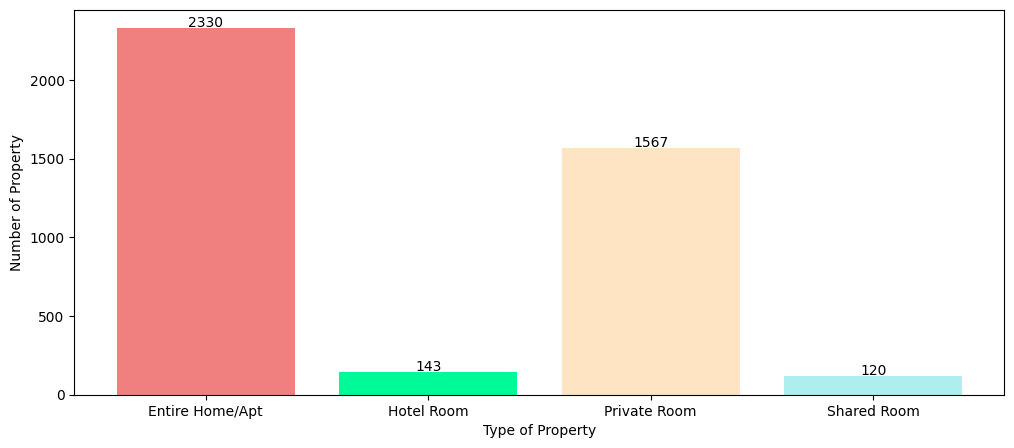

In [ ]:
# Checking the total properties offered by competitors
col = df_listings["room_type"].str.title()
col = pd.Categorical(col, ["Entire Home/Apt", "Hotel Room", "Private Room", "Shared Room"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.ylabel("Number of Property", fontsize = 10)
plt.xlabel("Type of Property", fontsize = 10)
plt.text(x = "Entire Home/Apt", y = 2340, s = "2330", ha='center',fontsize = 10)
plt.text(x = 'Private Room', y = 1577, s = "1567", ha='center',fontsize = 10)
plt.text(x = 'Hotel Room', y = 153, s = "144", ha='center',fontsize = 10)
plt.text(x = 'Shared Room', y = 130, s = "120", ha='center',fontsize = 10)
plt.show()

### The Most Rented Property Types by Customers While Visiting Singapore

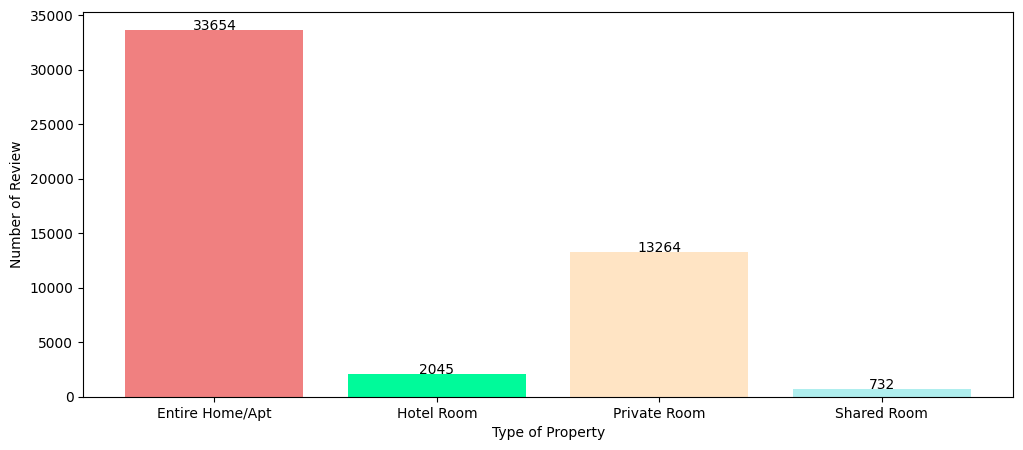

In [ ]:
# Checking The Most Rented Property Types by Customers While Visiting Singapore
col = df_review_listings["room_type"].str.title()
col = pd.Categorical(col, ["Entire Home/Apt", "Hotel Room", "Private Room", "Shared Room"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.ylabel("Number of Review", fontsize = 10)
plt.xlabel("Type of Property", fontsize = 10)
plt.text(x = "Entire Home/Apt", y = 33674, s = "33654", ha='center',fontsize = 10)
plt.text(x = 'Private Room', y = 13284, s = "13264", ha='center',fontsize = 10)
plt.text(x = 'Hotel Room', y = 2060, s = "2045", ha='center',fontsize = 10)
plt.text(x = 'Shared Room', y = 752, s = "732", ha='center',fontsize = 10)
plt.show()

### The Region Whose Properties Are Most Rented by Customers

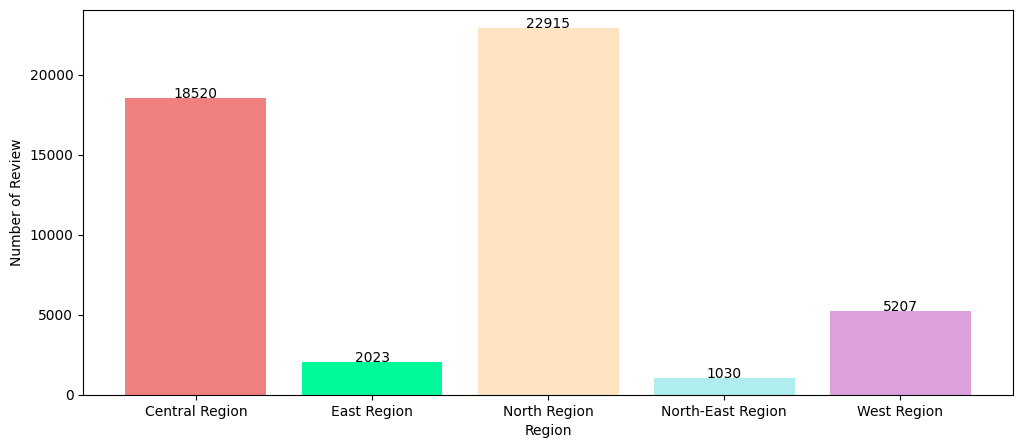

In [ ]:
# Checking The Region Whose Properties Are Most Rented by Customers
col = df_review_listings_neighbourhood["neighbourhood_group"].str.title()
col = pd.Categorical(col, ["Central Region", "East Region", "North Region", "North-East Region", "West Region"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.ylabel("Number of Review", fontsize = 10)
plt.xlabel("Region", fontsize = 10)
plt.text(x = "Central Region", y = 18540, s = "18520", ha='center',fontsize = 10)
plt.text(x = 'North Region', y = 22935, s = "22915", ha='center',fontsize = 10)
plt.text(x = 'West Region', y = 5227, s = "5207", ha='center',fontsize = 10)
plt.text(x = 'East Region', y = 2043, s = "2023", ha='center',fontsize = 10)
plt.text(x = 'North-East Region', y = 1050, s = "1030", ha='center',fontsize = 10)
plt.show()

### Why Do So Many Customers Rent Properties in the North Region? Is It Close to Merlion Park, a Singapore Landmark?

In [ ]:
Neighbourhood_Lat_Long = pd.DataFrame({'Number of Review' : df_review_listings_neighbourhood.groupby(["id", "neighbourhood_group", "neighbourhood", "name", "host_name", "latitude", "longitude", "price", "room_type"]).size()}).sort_values(by= 'Number of Review', ascending=False).reset_index()
Neighbourhood_Lat_Long.head(10)

id neighbourhood_group  neighbourhood  \
0  25360027        North Region      Woodlands   
1  27292304        North Region      Woodlands   
2  24834130        North Region      Woodlands   
3  26672993        North Region      Woodlands   
4  27419905        North Region      Woodlands   
5  23249199        North Region      Woodlands   
6  34051715        North Region      Woodlands   
7  43337094      Central Region  Downtown Core   
8  30682392        North Region      Woodlands   
9  29896147        North Region      Woodlands   

                                                name           host_name  \
0   „ÄêJB City SUASANA„Äëby‚íΩ‚ìà Breeze Cozy Getaway (^_^)/              Enrica   
1     SS„ÄêHavona Suite„Äëüè¨„ÄñKomtar JBCCüõçÔ∏èüõíJohor Bahru„Äó‚ù§Ô∏è  Bryce [RentRadise]   
2    NEW! Stylish & Luxury Modern HomeStay with WIFI              Xavier   
3  „ÄêTCH10„ÄëNETFLIX KingBed WiFi BigWorkspace Sanit...                 Kym   
4  „ÄêTCH9„ÄëFREE NETFLIX Parking King Bed WiFi Sanit...             Terence   
5       SS„ÄêKobe Suite„Äëüè¨„ÄñKomtar JBCCüõçÔ∏èüõíJohor Bahru„Äó‚ù§Ô∏è  Bryce [RentRadise]   
6  3 MIN CIQ‚ù§Ô∏èCozy SuasanaSuite Johor Bahru [CS J...             Yee Won   
7              Double Room, DAYUSE, 5 hours: 4PM-9PM                 Low   
8           SS„ÄêIris Suite„Äëüè¨üõí„ÄñSuasana‚òïüç¥Johor Bahru„Äó‚ù§Ô∏è  Bryce [RentRadise]   
9        RF„ÄêApollo Suite„Äëüõíüç¥„ÄñPick Up‚úàÔ∏èüß≥Johor Bahru„Äó‚ù§Ô∏è  Bryce [RentRadise]   

   latitude  longitude  price        room_type  Number of Review  
0   1.46438  103.76086     44  Entire home/apt               413  
1   1.46361  103.76170     47  Entire home/apt               352  
2   1.46207  103.76827     45  Entire home/apt               334  
3   1.46335  103.76151     43  Entire home/apt               291  
4   1.46366  103.76053     48  Entire home/apt               287  
5   1.46339  103.76208     47  Entire home/apt               285  
6   1.46374  103.76106     40  Entire home/apt               282  
7   1.29658  103.85595    119     Private room               279  
8   1.46253  103.76281     47  Entire home/apt               272  
9   1.46019  103.76855     48  Entire home/apt               268

In [ ]:
i = 0
Neighbourhood_Lat_Long["Distance to Merlion"] = np.nan
while i in range(len(Neighbourhood_Lat_Long)):
  coords_1 = (Neighbourhood_Lat_Long["latitude"][i], Neighbourhood_Lat_Long["longitude"][i])
  coords_east_coast = (1.2926978954626256, 103.85617890454725)
  Neighbourhood_Lat_Long["Distance to Merlion"][i] = geopy.distance.geodesic(coords_1, coords_east_coast).km
  i += 1

In [ ]:
North_Region_Lat_long = Neighbourhood_Lat_Long[Neighbourhood_Lat_Long["neighbourhood_group"] == "North Region"]
North_Region_Closest_Merlion = North_Region_Lat_long[North_Region_Lat_long["Distance to Merlion"] == North_Region_Lat_long["Distance to Merlion"].min()]
North_Region_Closest_Merlion

id neighbourhood_group            neighbourhood  \
2260  46669109        North Region  Central Water Catchment   

                                              name host_name  latitude  \
2260  Spacious and beautiful 3 bedroom at Clementi      Neha     1.351   

      longitude  price        room_type  Number of Review  Distance to Merlion  
2260  103.81921    575  Entire home/apt                 1             7.647731

In [ ]:
fig = px.scatter_mapbox(North_Region_Closest_Merlion, lat="latitude", lon="longitude", hover_name="name", hover_data=["neighbourhood", "host_name", "Distance to Merlion"], zoom=10, height=600, size="Distance to Merlion", color_continuous_scale="reds", size_max=15)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

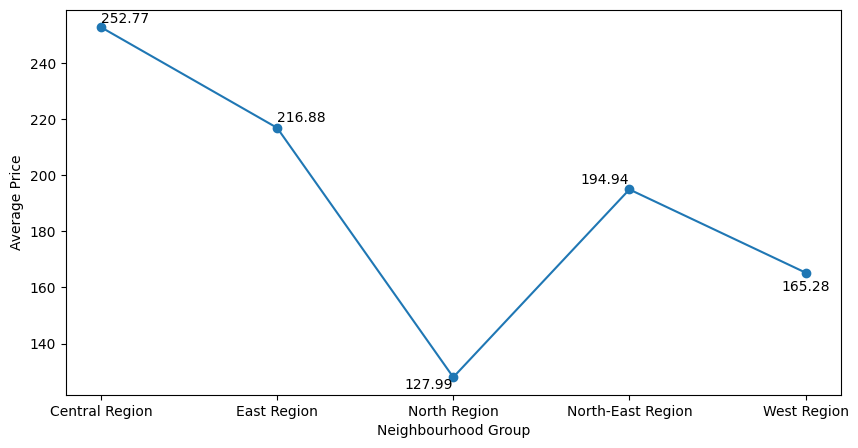

In [ ]:
# Check the average price per region
Mean_Price_Region = pd.DataFrame(df_listings_neighbourhood.groupby(["neighbourhood_group"])["price"].mean()).reset_index().sort_values(by= 'neighbourhood_group')

x = Mean_Price_Region["neighbourhood_group"]
y = Mean_Price_Region["price"]

plt.figure(figsize = (10, 5))
plt.plot(x, y, linestyle = 'solid', marker = 'o')
plt.ylabel("Average Price", fontsize = 10)
plt.xlabel("Neighbourhood Group", fontsize = 10)
plt.text(x = "Central Region", y = 254.4, s = "252.77", ha='left',fontsize = 10)
plt.text(x = 'East Region', y = 219, s = "216.88", ha='left',fontsize = 10)
plt.text(x = 'North Region', y = 124, s = "127.99", ha='right',fontsize = 10)
plt.text(x = 'North-East Region', y = 197, s = "194.94", ha='right',fontsize = 10)
plt.text(x = 'West Region', y = 159, s = "165.28", ha='center',fontsize = 10)
plt.show()

### Properties Offered by Competitors in the Northern Region

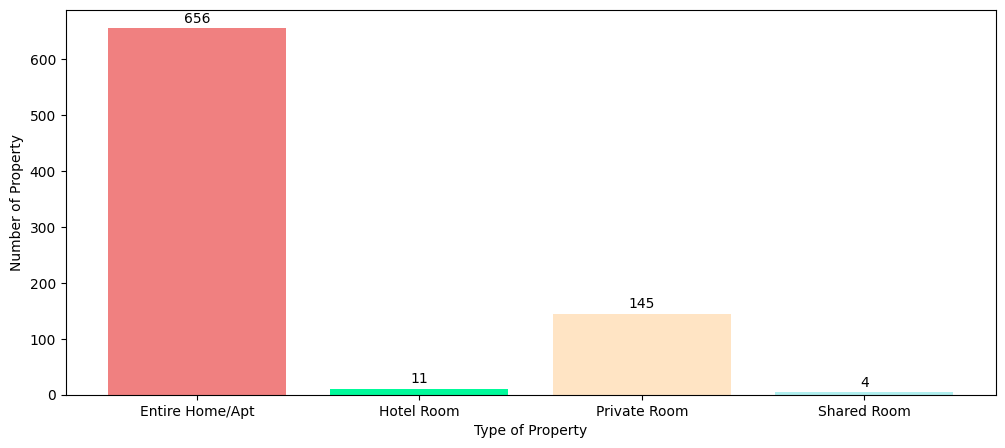

In [ ]:
# Checking Properties Offered by Competitors in the Northern Region
Listing_North_Region = df_listings_neighbourhood[df_listings_neighbourhood["neighbourhood_group"] == "North Region"]

col = Listing_North_Region["room_type"].str.title()
col = pd.Categorical(col, ["Entire Home/Apt", "Hotel Room", "Private Room", "Shared Room"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.ylabel("Number of Property", fontsize = 10)
plt.xlabel("Type of Property", fontsize = 10)
plt.text(x = "Entire Home/Apt", y = 666, s = "656", ha='center',fontsize = 10)
plt.text(x = 'Private Room', y = 155, s = "145", ha='center',fontsize = 10)
plt.text(x = 'Hotel Room', y = 21, s = "11", ha='center',fontsize = 10)
plt.text(x = 'Shared Room', y = 14, s = "4", ha='center',fontsize = 10)
plt.show()

### The Most Rented Properties by Customers in the North Region

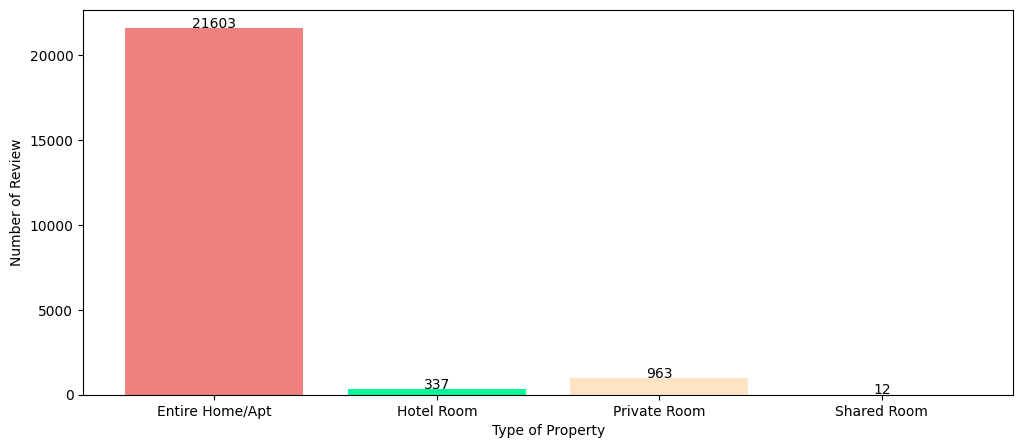

In [ ]:
# Check out properties offered by competitors in the northern region
Review_Listing_North_Region = df_review_listings_neighbourhood[df_review_listings_neighbourhood["neighbourhood_group"] == "North Region"]

col = Review_Listing_North_Region["room_type"].str.title()
col = pd.Categorical(col, ["Entire Home/Apt", "Hotel Room", "Private Room", "Shared Room"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.ylabel("Number of Review", fontsize = 10)
plt.xlabel("Type of Property", fontsize = 10)
plt.text(x = "Entire Home/Apt", y = 21623, s = "21603", ha='center',fontsize = 10)
plt.text(x = 'Private Room', y = 983, s = "963", ha='center',fontsize = 10)
plt.text(x = 'Hotel Room', y = 357, s = "337", ha='center',fontsize = 10)
plt.text(x = 'Shared Room', y = 32, s = "12", ha='center',fontsize = 10)
plt.show()

### Trend Review in the Northern Region From January 1, 2018 to September 22, 2022

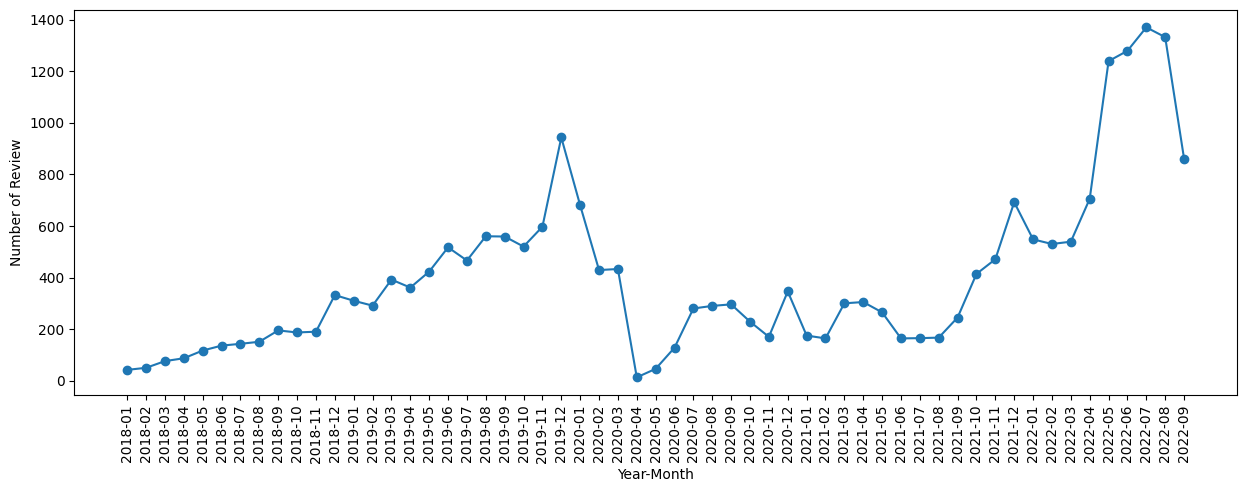

In [ ]:
# Checking trends in year-month form
North_Region_Trend_Per_Year_Month = pd.DataFrame({'Amount' : Review_Listing_North_Region.groupby(["year_month"]).size()}).reset_index().sort_values(by="year_month", ascending=True)

x = North_Region_Trend_Per_Year_Month['year_month'].astype(str)
y = North_Region_Trend_Per_Year_Month['Amount']

plt.figure(figsize = (15, 5))
plt.plot(x, y, linestyle = 'solid', marker = 'o')
plt.xlabel("Year-Month", fontsize = 10)
plt.ylabel("Number of Review", fontsize = 10)
plt.xticks(rotation=90, ha="center")
plt.show()

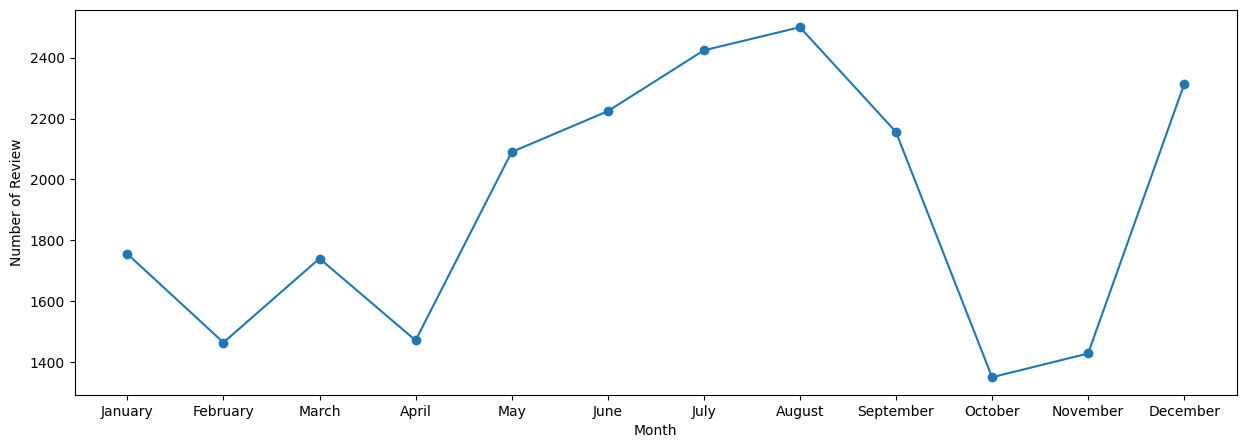

In [ ]:
# Checking trends in month form
col = Review_Listing_North_Region["month"]
col = pd.Categorical(col, ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
colValue = col.value_counts()

plt.figure(figsize = (15, 5))
plt.plot(colValue.index, colValue, linestyle = 'solid', marker = 'o')
plt.xticks(colValue.index, colValue.index.values)
plt.xlabel("Month", fontsize = 10)
plt.ylabel("Number of Review", fontsize = 10)
plt.show()

### Neighbourhoods in the Northern Region That Have the Most Customers

In [ ]:
asd = pd.DataFrame({'Amount' : Review_Listing_North_Region.groupby(["neighbourhood"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
asd

neighbourhood  Amount
4                Woodlands   20095
1             Lim Chu Kang    2336
3             Sungei Kadut     399
2                Sembawang      61
5                   Yishun      20
0  Central Water Catchment       4

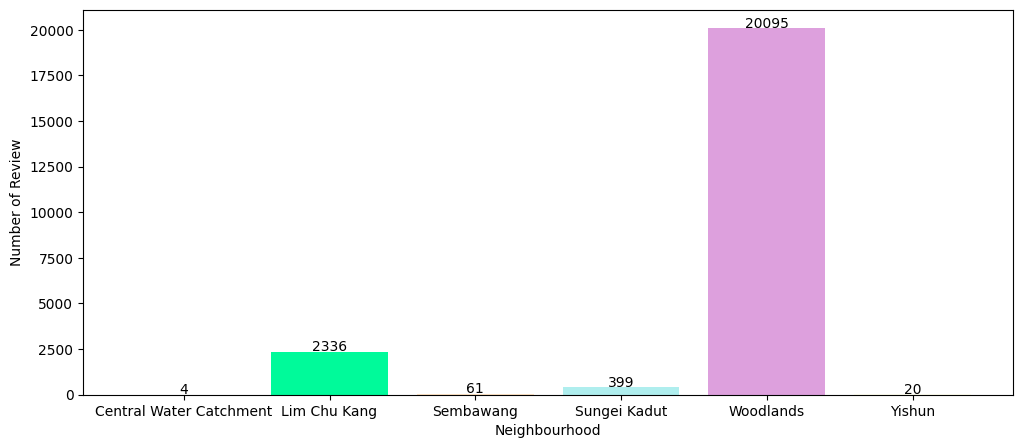

In [ ]:
# Checking Neighbourhoods in the Northern Region That Have the Most Customers
col = Review_Listing_North_Region["neighbourhood"]
col = pd.Categorical(col, ["Central Water Catchment", "Lim Chu Kang", "Sembawang", "Sungei Kadut", "Woodlands", "Yishun"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.ylabel("Number of Review", fontsize = 10)
plt.xlabel("Neighbourhood", fontsize = 10)
plt.text(x = "Central Water Catchment", y = 54, s = "4", ha='center',fontsize = 10)
plt.text(x = 'Lim Chu Kang', y = 2386, s = "2336", ha='center',fontsize = 10)
plt.text(x = 'Sembawang', y = 111, s = "61", ha='center',fontsize = 10)
plt.text(x = 'Sungei Kadut', y = 449, s = "399", ha='center',fontsize = 10)
plt.text(x = 'Woodlands', y = 20134, s = "20095", ha='center',fontsize = 10)
plt.text(x = 'Yishun', y = 70, s = "20", ha='center',fontsize = 10)
plt.show()

### Average Price of Top 10 Most Active Listings

In [ ]:
# Checking The Average Price of Top 10 Most Active Listings
Top10 = Neighbourhood_Lat_Long.head(10)
Top10["price"].mean()

52.8

In [ ]:
Top10

id neighbourhood_group  neighbourhood  \
0  25360027        North Region      Woodlands   
1  27292304        North Region      Woodlands   
2  24834130        North Region      Woodlands   
3  26672993        North Region      Woodlands   
4  27419905        North Region      Woodlands   
5  23249199        North Region      Woodlands   
6  34051715        North Region      Woodlands   
7  43337094      Central Region  Downtown Core   
8  30682392        North Region      Woodlands   
9  29896147        North Region      Woodlands   

                                                name           host_name  \
0   „ÄêJB City SUASANA„Äëby‚íΩ‚ìà Breeze Cozy Getaway (^_^)/              Enrica   
1     SS„ÄêHavona Suite„Äëüè¨„ÄñKomtar JBCCüõçÔ∏èüõíJohor Bahru„Äó‚ù§Ô∏è  Bryce [RentRadise]   
2    NEW! Stylish & Luxury Modern HomeStay with WIFI              Xavier   
3  „ÄêTCH10„ÄëNETFLIX KingBed WiFi BigWorkspace Sanit...                 Kym   
4  „ÄêTCH9„ÄëFREE NETFLIX Parking King Bed WiFi Sanit...             Terence   
5       SS„ÄêKobe Suite„Äëüè¨„ÄñKomtar JBCCüõçÔ∏èüõíJohor Bahru„Äó‚ù§Ô∏è  Bryce [RentRadise]   
6  3 MIN CIQ‚ù§Ô∏èCozy SuasanaSuite Johor Bahru [CS J...             Yee Won   
7              Double Room, DAYUSE, 5 hours: 4PM-9PM                 Low   
8           SS„ÄêIris Suite„Äëüè¨üõí„ÄñSuasana‚òïüç¥Johor Bahru„Äó‚ù§Ô∏è  Bryce [RentRadise]   
9        RF„ÄêApollo Suite„Äëüõíüç¥„ÄñPick Up‚úàÔ∏èüß≥Johor Bahru„Äó‚ù§Ô∏è  Bryce [RentRadise]   

   latitude  longitude  price        room_type  Number of Review  \
0   1.46438  103.76086     44  Entire home/apt               413   
1   1.46361  103.76170     47  Entire home/apt               352   
2   1.46207  103.76827     45  Entire home/apt               334   
3   1.46335  103.76151     43  Entire home/apt               291   
4   1.46366  103.76053     48  Entire home/apt               287   
5   1.46339  103.76208     47  Entire home/apt               285   
6   1.46374  103.76106     40  Entire home/apt               282   
7   1.29658  103.85595    119     Private room               279   
8   1.46253  103.76281     47  Entire home/apt               272   
9   1.46019  103.76855     48  Entire home/apt               268   

   Distance to Merlion  
0            21.746438  
1            21.626550  
2            21.129594  
3            21.611731  
4            21.694969  
5            21.584747  
6            21.673809  
7             0.430018  
8            21.462195  
9            20.931024

### What challenges will be faced by the owner

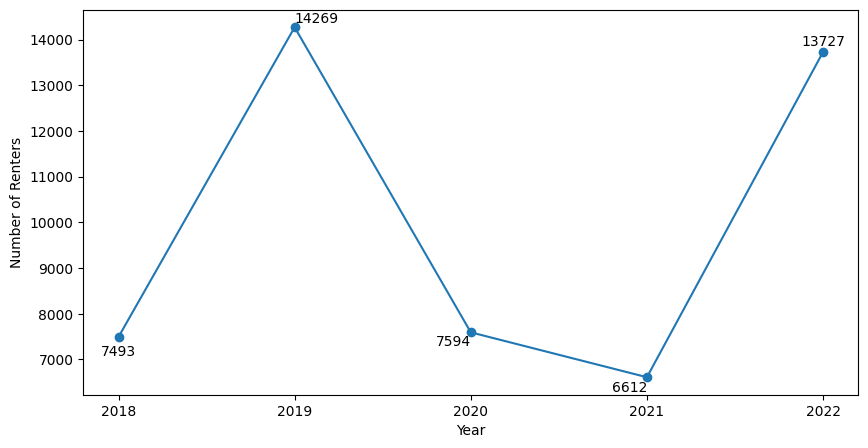

In [ ]:
# Checking Trend in Year Form
Reviews_Per_Year = pd.DataFrame({'Amount' : df_review_listings_neighbourhood.groupby(["year"]).size()}).reset_index().sort_values(by= 'year', ascending=True)

x = Reviews_Per_Year['year'].astype(str)
y = Reviews_Per_Year['Amount']

plt.figure(figsize = (10, 5))
plt.plot(x, y, linestyle = 'solid', marker = 'o')
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Number of Renters", fontsize = 10)
plt.text(x = '2018', y = 7093, s = "7493", ha='center',fontsize = 10)
plt.text(x = '2019', y = 14369, s = "14269", ha='left',fontsize = 10)
plt.text(x = '2020', y = 7294, s = "7594", ha='right',fontsize = 10)
plt.text(x = '2021', y = 6300, s = "6612", ha='right',fontsize = 10)
plt.text(x = '2022', y = 13857, s = "13727", ha='center',fontsize = 10)
plt.show()

In [ ]:
u# Checking The Percentage Accumulation
percentage_accumulation = Reviews_Per_Year.copy()
percentage_accumulation['perc_acc'] = 100*(percentage_accumulation["Amount"] / percentage_accumulation["Amount"].sum())
percentage_accumulation["diff"] = percentage_accumulation['perc_acc'].diff()

s = pd.Series([0, '2018-2019', '2019-2020', '2020-2021', '2021-2022'])
df_accumulation = pd.DataFrame()
df_accumulation["Year"] = pd.DataFrame(s)
df_accumulation["Difference"] = percentage_accumulation['perc_acc'].diff()
dfaccpct = df_accumulation[1:]
dfaccpct

Year  Difference
1  2018-2019   13.635175
2  2019-2020  -13.431935
3  2020-2021   -1.976054
4  2021-2022   14.317336

In [ ]:
# listings that closed
inactive_listing = df_listings[df_listings["availability_365"] == 365]
print(len(inactive_listing))

446
